# MODEL 1: SIMPLE LINEAR REGRESSION.
GENERATE SCATTERPLOT OF EACH PARTICIPANT'S % ACCURATE ON NAMES VS OBJECTS.

## Imports & Load Data

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
# read in accuracy.csv as a dataframe
accuracy = pd.read_csv('3b_accuracy.csv')

## Prepare dataframe for plotting & regression:

In [3]:
# accuracy by test type (names or objects) and by nth_participant
accuracy_type_nth = (
    accuracy.groupby(['names_or_objects', 'nth_participant'])['accuracy'].sum()
    .unstack('names_or_objects')
    .rename_axis(columns=None)  # Flatten column index. Unstack & Pivot create a Multi-column Index, trying to keep names_or_objects as an overarching name for names and objects
)
accuracy_type_nth.head()

,names,objects
nth_participant,,
3,9,13
4,4,13
7,6,5
10,4,8
13,8,13


## run regression

In [4]:
# Extract values
x = accuracy_type_nth['names']
y = accuracy_type_nth['objects']

# Run regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print regression stats
print("Regression stats:")
print(f"  Slope:      {slope:.3f}")
print(f"  Intercept:  {intercept:.3f}")
print(f"  R-squared:  {r_value**2:.3f}")
print(f"  p-value:    {p_value:.4f}")
print(f"  Std. error: {std_err:.3f}")

# Generate x values for line
x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = intercept + slope * x_vals

Regression stats:
  Slope:      0.662
  Intercept:  4.834
  R-squared:  0.250
  p-value:    0.0022
  Std. error: 0.200


## Scatterplot with Regression Line:

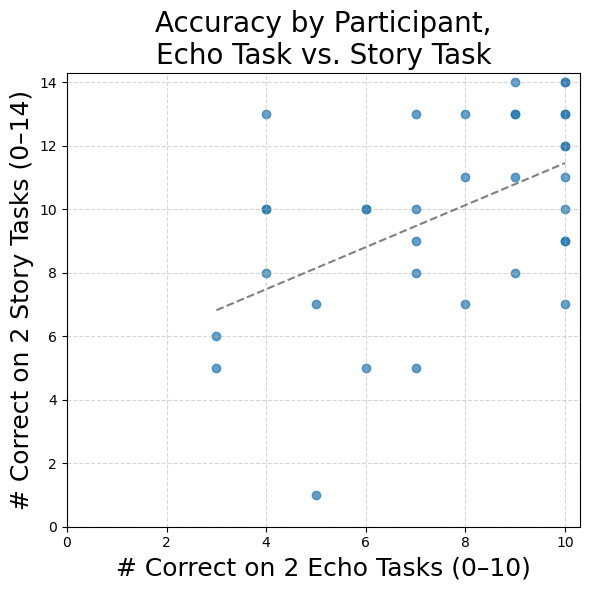

In [5]:
# Create the scatterplot
plt.figure(figsize=(6,6))
plt.scatter(
    accuracy_type_nth['names'],
    accuracy_type_nth['objects'],
    alpha=0.7
)
plt.plot(x_vals, y_vals, linestyle='--', color='grey', label='Regression line')

# Set axis limits
plt.xlim(0, 10.3)
plt.ylim(0, 14.3)

# Labels and title
plt.xlabel('# Correct on 2 Echo Tasks (0–10)', fontsize=18)
plt.ylabel('# Correct on 2 Story Tasks (0–14)', fontsize=18)
plt.title('Accuracy by Participant,\nEcho Task vs. Story Task', fontsize=20)
plt.tight_layout()

# Optional grid
plt.grid(True, linestyle='--', alpha=0.5)

# saving as pdf is best, for including in an overleaf document that will be scaled up and printed-- it will be
# saved as a "scalable vector graphic", apparently.
plt.savefig("4c_SLR.pdf", bbox_inches='tight') 

# Show the plot AFTER saving
plt.show() 